### Import Libraries


In [83]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from itertools import combinations
from collections import Counter


### Merge the data

In [84]:
# import os
# import pandas as pd

# files = [file for file in os.listdir('Data') if not file.startswith('.')]  # Exclude hidden files
# all_months_data = pd.DataFrame()

# for file in files:
#     df = pd.read_csv(os.path.join('Data', file))  # Use os.path.join for better path handling
#     all_months_data = pd.concat([all_months_data, df])

# all_months_data.to_csv('Data/Merged_data.csv', index=False)

### Read the data

In [85]:
dataset = pd.read_csv('Data/Merged_data.csv')

In [86]:
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

#### Drop empty rows

In [88]:
dataset.shape

(186850, 6)

In [89]:
dataset = dataset.dropna(how = 'all')
dataset.shape

(186305, 6)

#### Fix Columns dtypes


In [90]:
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'], errors='coerce')
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'], errors='coerce')

### Question 1 : What was the best month for sales? How much was earned that month?

#### Add a Month column

In [91]:
#Change the column type
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'],format='%m/%d/%y %H:%M' , errors = 'coerce') 

#Create the month column
dataset['Month'] = dataset['Order Date'].dt.month 


#delete the null values from the month and change the type to int
dataset = dataset.dropna(subset=['Month'] , how = 'all') 
dataset['Month'] = dataset['Month'].astype(int)
dataset.reset_index(drop=True, inplace=True)   

#### Add Sales column

In [92]:
#Change the 'Quantity Ordered' column and the 'Price Each' Column into numeric to multiply them 

dataset['Sales'] = dataset['Quantity Ordered'] * dataset['Price Each']

In [93]:
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question answer

In [94]:
# Convert to dataframe for better visualization

result = dataset.groupby('Month')['Sales'].sum()
result_DataFrame = pd.DataFrame(result)
result_DataFrame

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


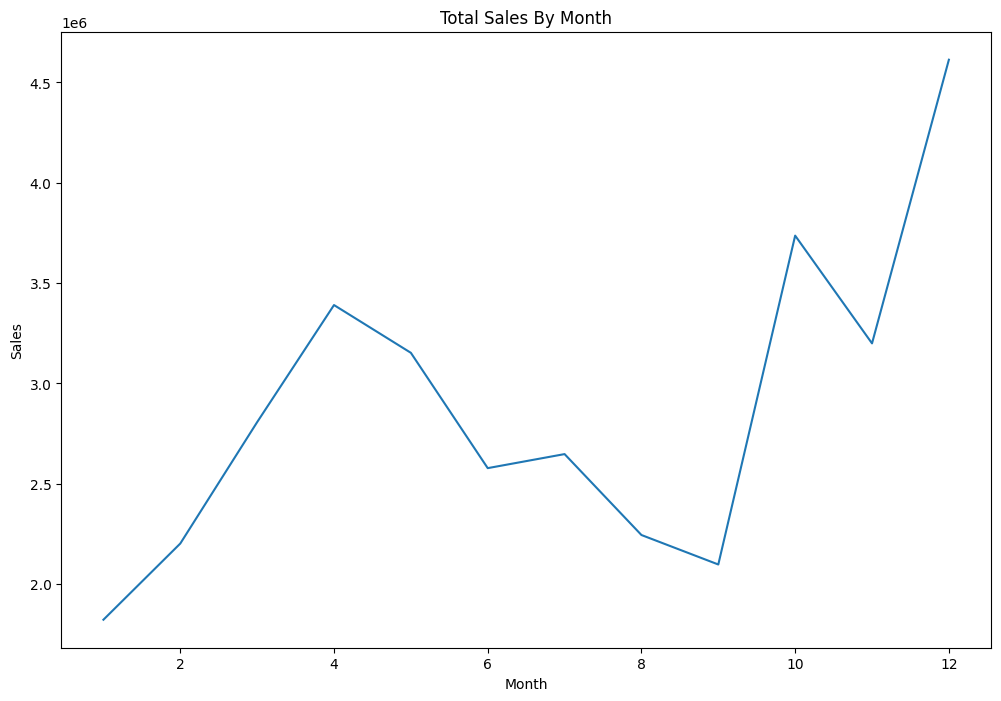

In [95]:
#linePlot using seaborn

sns.lineplot(x=result_DataFrame.index, y='Sales', data=result_DataFrame)
plt.title('Total Sales By Month')
plt.show()

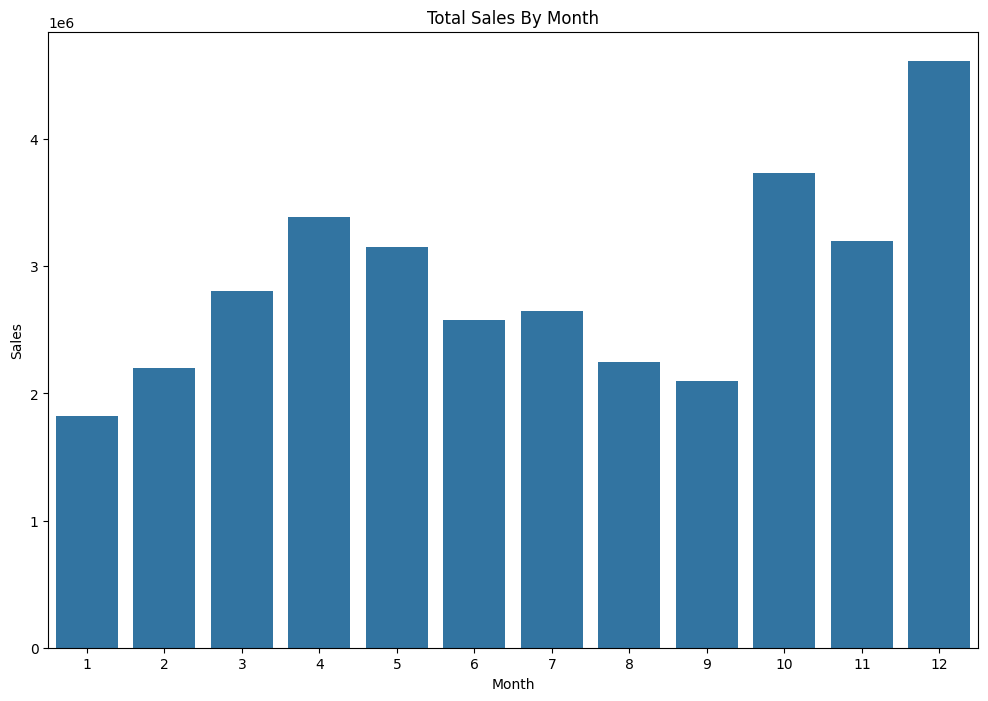

In [96]:
#barplot 

sns.barplot(x=result_DataFrame.index, y='Sales', data=result_DataFrame)
plt.title('Total Sales By Month')
plt.show()

### Question 2: What city had the highest number of sales 

#### Add City Column

In [97]:
# Extract city from the address column
city = dataset['Purchase Address'].apply(lambda x: x.split(',')[1].strip())  # Split by comma and get the second element

# Extract state from the address column
state = dataset['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1].strip())  # Split by comma, then by space and get the second element

# Combine city and state
dataset['City'] = city + ' ' + state

# Display the dataset with the new 'City' column
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Question Answer

In [98]:
result = dataset.groupby('City')['Sales'].sum().sort_values(ascending= False)
result_DataFrame = pd.DataFrame(result)
result_DataFrame

,Sales
City,
San Francisco CA,8262203.91
Los Angeles CA,5452570.80
New York City NY,4664317.43
Boston MA,3661642.01
Atlanta GA,2795498.58
Dallas TX,2767975.40
Seattle WA,2747755.48
Portland OR,1870732.34
Austin TX,1819581.75


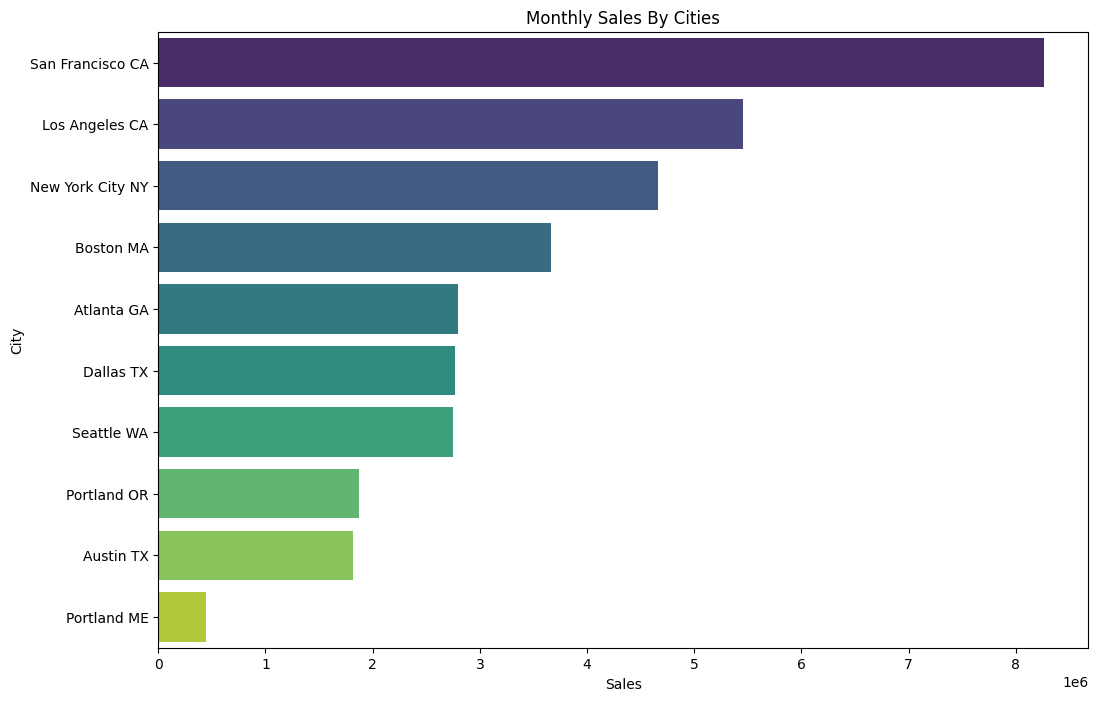

In [99]:
#Plotting

sns.barplot(x='Sales', y='City', data=result_DataFrame, hue='City', dodge=False, palette='viridis', legend=False)
plt.title('Monthly Sales By Cities')
plt.show()

### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying products?

#### Add 'Hours' column

In [100]:
dataset['Hour'] = dataset['Order Date'].dt.hour
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


#### Question Answer

In [101]:
hourly_orders = dataset.groupby('Hour').size().reset_index(name='Number of Orders')
hourly_orders

,Hour,Number of Orders
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


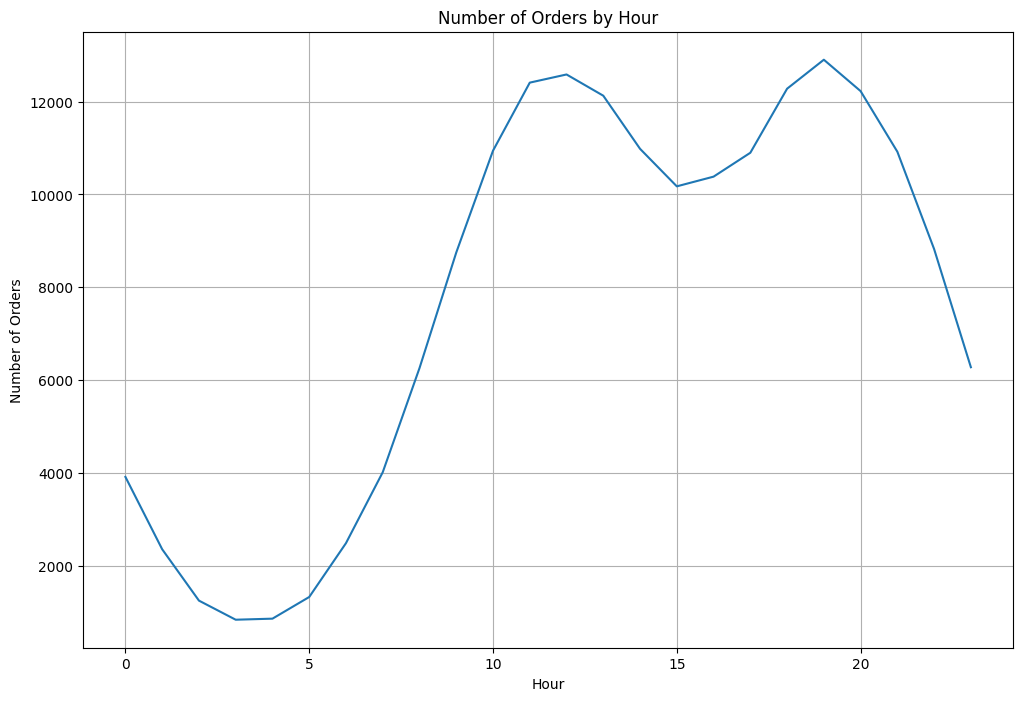

In [102]:
#plotting
sns.lineplot(x='Hour', y='Number of Orders', data=hourly_orders)
plt.title('Number of Orders by Hour')
plt.grid(True)
plt.show()

### Question 4: What products are most often sold together 

#### Extract and Group Products by Order ID

In [103]:
# Filter the dataframe to keep only rows with duplicated Order IDs
duplicated_Dataset = dataset[dataset['Order ID'].duplicated(keep=False)].copy()

# Group products by Order ID and concatenate them into a single string
duplicated_Dataset['Grouped'] = duplicated_Dataset.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate rows keeping only 'Order ID' and 'Grouped' columns
duplicated_Dataset = duplicated_Dataset[['Order ID', 'Grouped']].drop_duplicates()

duplicated_Dataset.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Count Pair Of Products

In [104]:
count = Counter()
for row in duplicated_Dataset['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #how many items in each group in this example(2 items)
    
for key , value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Plotting

In [105]:
# Sort the count dictionary by values in descending order and take the top 10 items
top_10_combinations = dict(sorted(count.items(), key=lambda item: item[1], reverse=True)[:10])

# Extracting the products and their counts
product_combinations = [', '.join(key) for key in top_10_combinations.keys()]
counts = list(top_10_combinations.values())

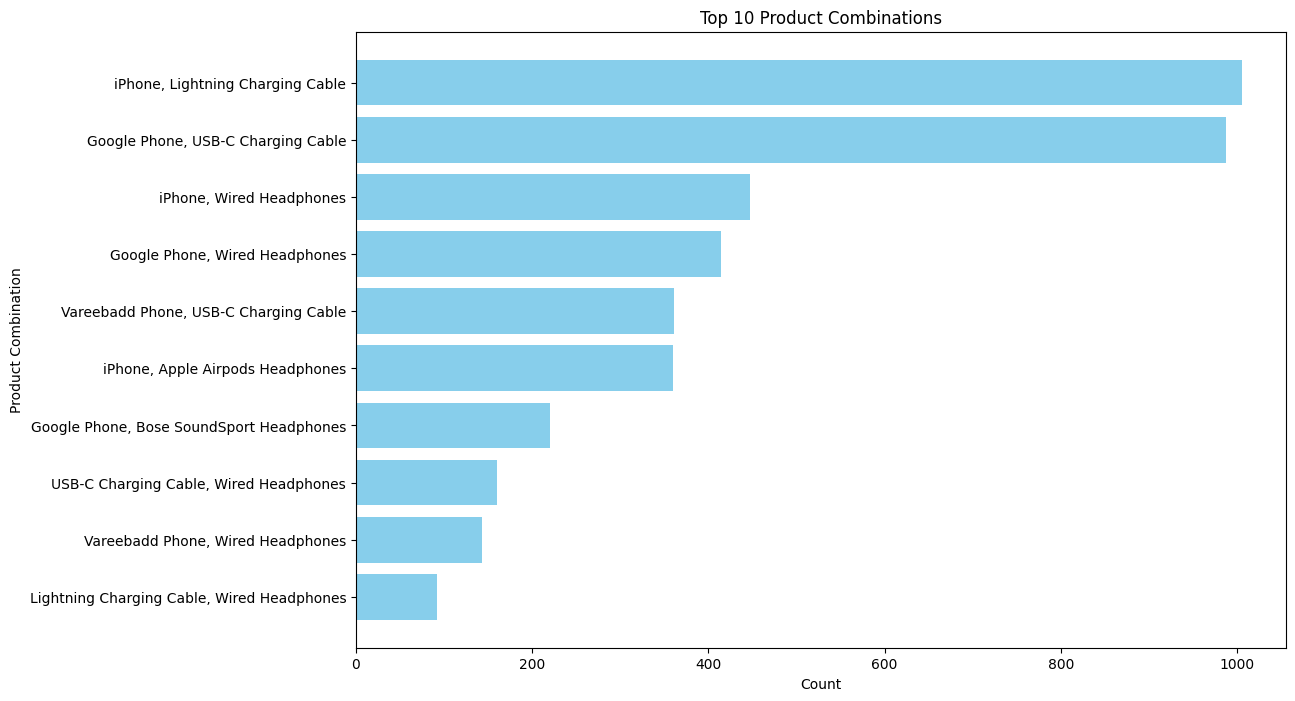

In [106]:
#Plotting 

plt.barh(product_combinations, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Product Combination')
plt.title('Top 10 Product Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()

### Question 5: What Product Sold the most

#### Question Answer

In [113]:
result = dataset.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)
result_DataFrame = pd.DataFrame(result)
result_DataFrame

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
27in FHD Monitor,7550.0
iPhone,6849.0


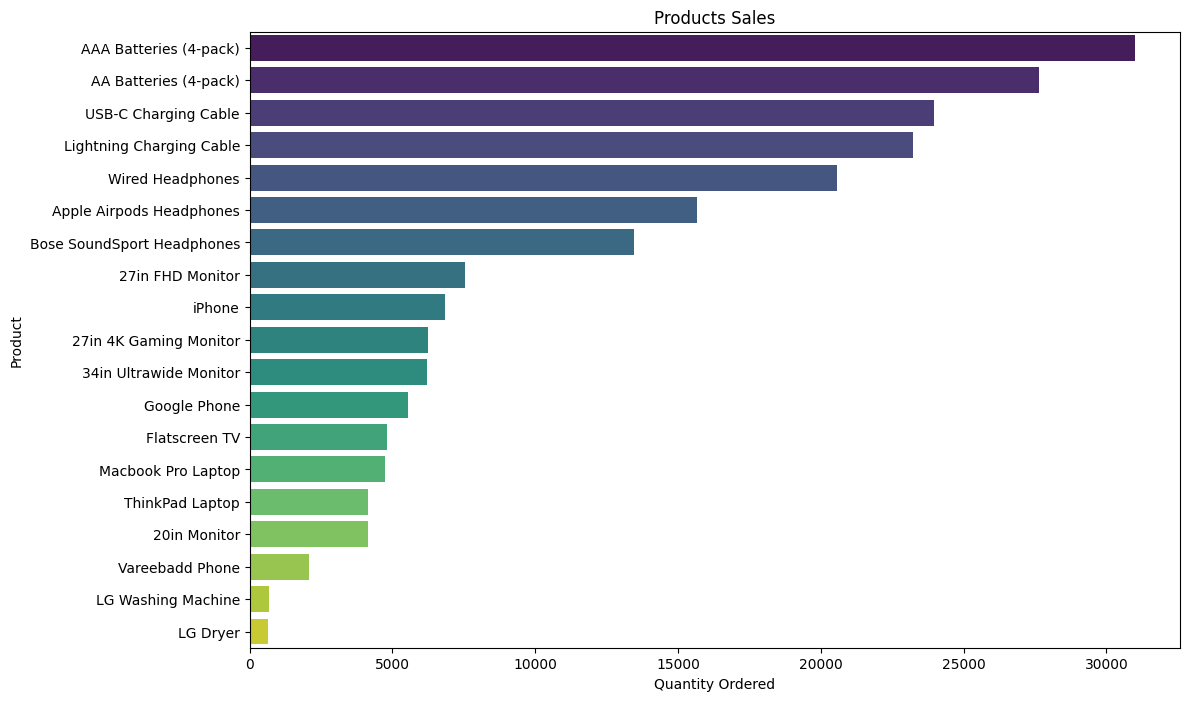

In [114]:
#Plotting

sns.barplot(x='Quantity Ordered', y='Product', data=result_DataFrame, hue='Product', dodge=False, palette='viridis', legend=False)
plt.title('Products Sales')
plt.show()